In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
bs = 100 #batch size

# MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))])

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./mnist_data/', train=False, transform=transform, download=False)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=bs, shuffle=False)

Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw


Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
class Generator(nn.Module):
    def __init__(self, g_input_dim, g_output_dim):
        super(Generator, self).__init__()       
        
    # forward method
    def forward(self, x): 
       
        return x

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, d_input_dim):
        super(Discriminator, self).__init__()
       
    # forward method
    def forward(self, x):
       
        return x

In [ ]:
def D_train(x):
    #=======================Train the discriminator=======================#
    D.zero_grad()

    # train discriminator on real
   
    # train discriminator on fake
   
    # gradient backprop & optimize ONLY D's parameters
   
    return 0
    
def G_train(x):
    #=======================Train the generator=======================#
    G.zero_grad()

    # gradient backprop & optimize ONLY G's parameters
     
    return 0

In [ ]:
# build network
z_dim = 100
mnist_dim = train_dataset.train_data.size(1) * train_dataset.train_data.size(2)

G = Generator(g_input_dim = z_dim, g_output_dim = mnist_dim).to(device)
D = Discriminator(mnist_dim).to(device)


# loss
criterion = nn.BCELoss() 

# optimizer
lr = 0.0002 
G_optimizer = optim.Adam(G.parameters(), lr = lr)
D_optimizer = optim.Adam(D.parameters(), lr = lr)

# epoch nbr
n_epoch =20

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
for epoch in range(1, n_epoch+1):           
    D_losses, G_losses = [], []
    for batch_idx, (x, _) in enumerate(train_loader):
        D_losses.append(D_train(x))
        G_losses.append(G_train(x))

    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch), n_epoch, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))
            
            


[1/20]: loss_d: 0.932, loss_g: 2.756
[2/20]: loss_d: 1.164, loss_g: 1.296
[3/20]: loss_d: 0.997, loss_g: 2.341
[4/20]: loss_d: 0.700, loss_g: 2.640
[5/20]: loss_d: 0.529, loss_g: 3.063
[6/20]: loss_d: 0.675, loss_g: 2.528
[7/20]: loss_d: 0.612, loss_g: 2.362
[8/20]: loss_d: 0.640, loss_g: 2.398
[9/20]: loss_d: 0.579, loss_g: 2.592
[10/20]: loss_d: 0.628, loss_g: 2.450
[11/20]: loss_d: 0.664, loss_g: 2.281
[12/20]: loss_d: 0.713, loss_g: 2.205
[13/20]: loss_d: 0.783, loss_g: 1.960
[14/20]: loss_d: 0.770, loss_g: 1.986
[15/20]: loss_d: 0.822, loss_g: 1.906
[16/20]: loss_d: 0.834, loss_g: 1.795
[17/20]: loss_d: 0.786, loss_g: 1.963
[18/20]: loss_d: 0.833, loss_g: 1.863
[19/20]: loss_d: 0.861, loss_g: 1.774
[20/20]: loss_d: 0.864, loss_g: 1.760


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


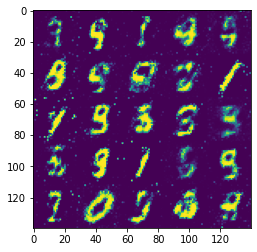

In [ ]:
with torch.no_grad():
    test_z = Variable(torch.randn(bs, z_dim).to(device))
    generated = G(test_z)
    generated=generated.view(generated.size(0), 1, 28, 28)
    generated=generated.cpu().detach().numpy()
    NumImgs=5
    ImgMatrix=np.zeros((NumImgs*train_dataset.train_data.size(1),NumImgs*train_dataset.train_data.size(2)))
    for i in range(NumImgs):
        for j in range(NumImgs):
            ImgMatrix[i*train_dataset.train_data.size(1):(i+1)*train_dataset.train_data.size(1) ,j*train_dataset.train_data.size(2):(j+1)*train_dataset.train_data.size(2) ]=generated[NumImgs*i+j,0,:,:]
    plt.imshow(ImgMatrix)
    plt.show()
    #save_image(generated.view(generated.size(0), 1, 28, 28), './sample_' + '.png')
